In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
STOPWORDS = set(stopwords.words('arabic'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
import re
import string
from nltk.corpus import stopwords

# Arabic stop words with nltk
stop_words = set(stopwords.words('arabic'))

In [ ]:
!pip install scikeras
!pip install Keras-Preprocessing
!pip install tensorflow-cloud


In [ ]:
!pip install -U pip keras tensorflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 14.2 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 23.1.2
    Uninstalling pip-23.1.2:
      Successfully uninstalled pip-23.1.2


In [ ]:
import re
import string
import numpy as np
import pandas as pd
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split, KFold
from sklearn.pipeline import make_pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.neural_network import MLPClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier

# Function to preprocess Arabic text
def preprocess(text):
    # Define Arabic stop words with nltk
    stop_words = set(stopwords.words('arabic'))

    # Define Arabic and English punctuations
    punctuations = '''`÷×؛<>_()*&^%][ـ،/:"؟.,'{}~¦+|!”…“–ـ''' + string.punctuation

    # Compile regex pattern for Arabic diacritics
    arabic_diacritics = re.compile("""
                             ّ    | # Shadda
                             َ    | # Fatha
                             ً    | # Tanwin Fath
                             ُ    | # Damma
                             ٌ    | # Tanwin Damm
                             ِ    | # Kasra
                             ٍ    | # Tanwin Kasr
                             ْ    | # Sukun
                             ـ     # Tatwil/Kashida
                         """, re.VERBOSE)

    # Convert non-string inputs to strings
    text = str(text)

    # Remove punctuations
    translator = str.maketrans('', '', punctuations)
    text = text.translate(translator)

    # Remove non-Arabic words
    arabic_text = re.sub(r'[^\u0600-\u06FF\s]', '', text)

    # Remove diacritics
    arabic_text = re.sub(arabic_diacritics, '', arabic_text)

    # Remove longation
    arabic_text = re.sub("[إأآا]", "ا", arabic_text)
    arabic_text = re.sub("ى", "ي", arabic_text)
    arabic_text = re.sub("ؤ", "ء", arabic_text)
    arabic_text = re.sub("ئ", "ء", arabic_text)
    arabic_text = re.sub("ة", "ه", arabic_text)
    arabic_text = re.sub("گ", "ك", arabic_text)

    # Remove stopwords
    arabic_text = ' '.join(word for word in arabic_text.split() if word not in stop_words)

    return arabic_text

# Read data
data = pd.read_excel(r"data1.xlsx")
data.drop(data.columns[data.columns.str.contains('Unnamed', case=True)], axis=1, inplace=True)

# Preprocess tweet column
data['tweet'] = data['tweet'].apply(preprocess)
data.dropna(subset=['tweet'], inplace=True)
data['type'].fillna('unknown', inplace=True)

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode the 'type' column
data['type_encoded'] = label_encoder.fit_transform(data['type'])

# Split the data into features and target variables
feature = data['tweet']
target = data[['Bullying', 'type_encoded']]

ImportError: cannot import name '_fit_context' from 'sklearn.base' (/usr/local/lib/python3.10/dist-packages/sklearn/base.py)

In [ ]:
!pip install --upgrade scikit-learn

In [ ]:
import pandas as pd

# Read the dataset from the CSV file
df = pd.read_csv("results.csv")

# Compute average and median for each algorithm (unigram, bigram, and trigram)
result = df.groupby(['Classifier', 'Feature Extraction']).agg({'Accuracy_fold_1': ['mean', 'median'],
                                                               'Precision_fold_1': ['mean', 'median'],
                                                               'Recall_fold_1': ['mean', 'median'],
                                                               'F-score_fold_1': ['mean', 'median'],
                                                               'Accuracy_fold_2': ['mean', 'median'],
                                                               'Precision_fold_2': ['mean', 'median'],
                                                               'Recall_fold_2': ['mean', 'median'],
                                                               'F-score_fold_2': ['mean', 'median'],
                                                               'Accuracy_fold_3': ['mean', 'median'],
                                                               'Precision_fold_3': ['mean', 'median'],
                                                               'Recall_fold_3': ['mean', 'median'],
                                                               'F-score_fold_3': ['mean', 'median']})

# Flatten the MultiIndex columns
result.columns = [' '.join(col).strip() for col in result.columns.values]

# Rename columns
result.rename(columns={'Accuracy_fold_1 mean': 'Average Accuracy', 'Accuracy_fold_1 median': 'Median Accuracy',
                       'Precision_fold_1 mean': 'Average Precision', 'Precision_fold_1 median': 'Median Precision',
                       'Recall_fold_1 mean': 'Average Recall', 'Recall_fold_1 median': 'Median Recall',
                       'F-score_fold_1 mean': 'Average F-score', 'F-score_fold_1 median': 'Median F-score'},
              inplace=True)

# Display the result
print(result)


                                              Average Accuracy  \
Classifier                Feature Extraction                     
AdaBoost                  Bigram                      0.856018   
                          Trigram                     0.853768   
                          Unigram                     0.853393   
Artificial Neural Network Bigram                      0.887139   
                          Trigram                     0.884514   
                          Unigram                     0.884139   
Decision Tree             Bigram                      0.855268   
                          Trigram                     0.860892   
                          Unigram                     0.851519   
Gradient Boosting         Bigram                      0.850394   
                          Trigram                     0.850394   
                          Unigram                     0.847769   
K-Nearest Neighbors       Bigram                      0.805399   
          

In [ ]:
import pandas as pd

# Load data from CSV
data = pd.read_csv('average_metrics.csv')

# Print the results in the desired format
print("Model\t\t\tPrec.\tRecall\tF1")
for index, row in data.iterrows():
    model = row['Classifier']
    precision = (row['Precision_fold_1'] + row['Precision_fold_2'] + row['Precision_fold_3']) / 3
    recall = (row['Recall_fold_1'] + row['Recall_fold_2'] + row['Recall_fold_3']) / 3
    f1 = (row['F-score_fold_1'] + row['F-score_fold_2'] + row['F-score_fold_3']) / 3
    print(f"{model}\t\t{precision:.1f}\t{recall:.1f}\t{f1:.1f}")


Model			Prec.	Recall	F1
AdaBoost		0.8	0.3	0.5
Artificial Neural Network		0.8	0.5	0.7
Decision Tree		0.7	0.5	0.6
Gradient Boosting		0.9	0.2	0.4
K-Nearest Neighbors		0.6	0.0	0.0
Logistic Regression		1.0	0.2	0.3
Naive Bayes		1.0	0.1	0.1
Random Forest		0.9	0.4	0.5
SVM		1.0	0.2	0.3


In [ ]:
def get_bullying_counts(data):
    # Count the occurrences of bullying and non-bullying tweets
    bullying_count = data['Bullying'].value_counts()

    # Count the occurrences of different types of bullying
    type_counts = data['type'].value_counts()

    return bullying_count, type_counts

# Example usage:
bullying_count, type_counts = get_bullying_counts(data)

print("Counts of bullying vs. non-bullying tweets:")
print(bullying_count)
print("\nCounts of different types of bullying:")
print(type_counts)


Counts of bullying vs. non-bullying tweets:
0    6430
1    1570
Name: Bullying, dtype: int64

Counts of different types of bullying:
unknown         6455
Generic          522
Politics         306
Sport            246
Sexual           215
Intelligence      89
Religious         83
Racial            56
Appearance        28
Name: type, dtype: int64


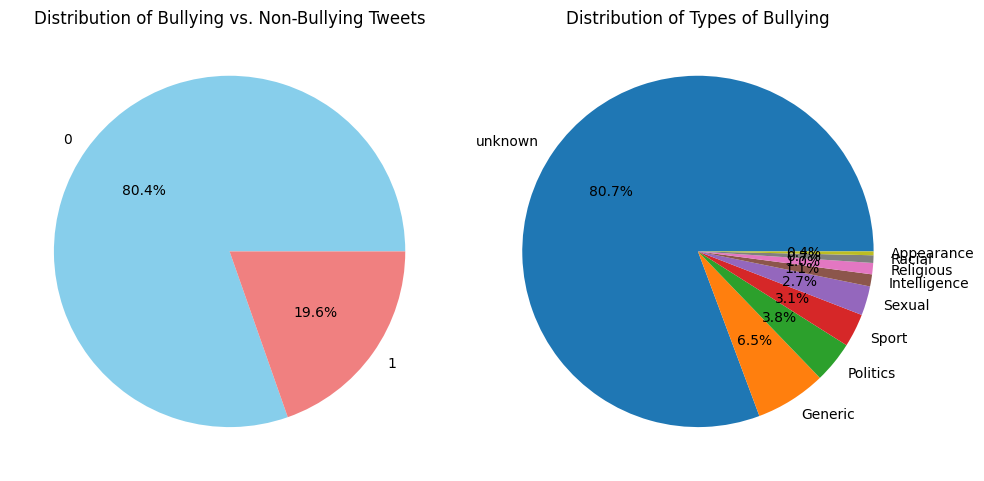

In [ ]:
import matplotlib.pyplot as plt

# Calculate the counts of bullying and non-bullying tweets
bullying_counts = data['Bullying'].value_counts()

# Plot pie chart for bullying vs. non-bullying tweets
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.pie(bullying_counts, labels=bullying_counts.index, autopct='%1.1f%%', colors=['skyblue', 'lightcoral'])
plt.title('Distribution of Bullying vs. Non-Bullying Tweets')

# Calculate the counts of different types of bullying
type_counts = data['type'].value_counts()

# Plot pie chart for types of bullying
plt.subplot(1, 2, 2)
plt.pie(type_counts, labels=type_counts.index, autopct='%1.1f%%')
plt.title('Distribution of Types of Bullying')
plt.tight_layout()

plt.show()


In [ ]:
def get_unique_rows(data, num_rows=10):
    unique_data = data.drop_duplicates()
    unique_sample = unique_data.sample(n=num_rows, random_state=42)
    return unique_sample.reset_index(drop=True)


unique_rows_df = get_unique_rows(data)

unique_rows_df

,id,tweet,Bullying,type,type_encoded
0,2216,حبيبيي خوي انت بخير صحه سلامه طولت العمر,0,unknown,8
1,2583,قوك النصر اخذ الصداره قدام الهلال وصاروا مشجعي...,0,unknown,8
2,1663,الطواقي اطولهم اصبخ روسهم تفوزون تفوزون مافيه ...,1,Sport,7
3,3028,تخيليوصل الحد لقطيات لتورته بمءات الريالاتوذهب...,0,unknown,8
4,4344,قمر قمر قمر قمر,0,unknown,8
5,2681,سلطه مدنيه نرقد عشان نموت,0,unknown,8
6,1766,اللهم فرج عنا وعن مكروب واقضي ديننا وكل مديون ...,0,unknown,8
7,1124,عم عم احنا نعجز وهما,0,unknown,8
8,4055,رساله البرهان الثعبان واضحه ثوار ابطال انتم مش...,1,Politics,3
9,3762,بسم الله شاء الله الله اكبر ريسنا بطل خمسه وخم...,0,unknown,8


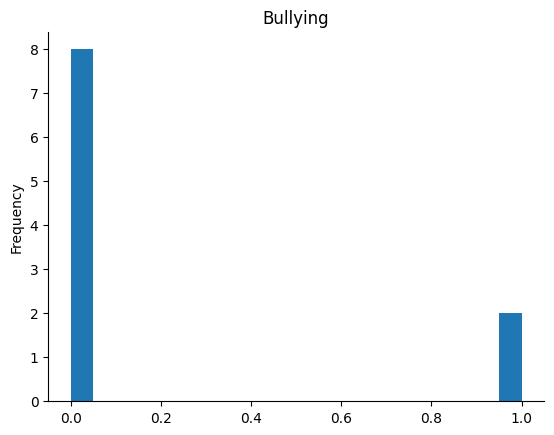

In [ ]:
# @title Bullying

from matplotlib import pyplot as plt
unique_rows_df['Bullying'].plot(kind='hist', bins=20, title='Bullying')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
!pip uninstall scikit-learn --yes
!pip uninstall imblearn --yes
!pip install scikit-learn==1.2.2
!pip install imblearn

Found existing installation: scikit-learn 1.4.2
Uninstalling scikit-learn-1.4.2:
  Successfully uninstalled scikit-learn-1.4.2
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 15.9 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
scikeras 0.13.0 requires scikit-learn>=1.4.2, but you have scikit-learn 1.2.2 which is incompatible.


In [ ]:
import pandas as pd
import re
import string
import numpy as np
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE

# Function to preprocess Arabic text
def preprocess(text):
    stop_words = set(stopwords.words('arabic'))
    punctuations = string.punctuation + '''`÷×؛<>_()*&^%][ـ،/:"؟.,'{}~¦+|!”…“–ـ'''
    arabic_diacritics = re.compile("""
                             ّ    | # Shadda
                             َ    | # Fatha
                             ً    | # Tanwin Fatha
                             ُ    | # Damma
                             ٌ    | # Tanwin Damma
                             ِ    | # Kasra
                             ٍ    | # Tanwin Kasra
                             ْ    | # Sukun
                             ـ     # Tatwil/Kashida
                         """, re.VERBOSE)

    text = str(text)
    text = text.translate(str.maketrans('', '', punctuations))
    text = re.sub(arabic_diacritics, '', text)
    text = re.sub("[إأآا]", "ا", text)
    text = re.sub("ى", "ي", text)
    text = re.sub("ؤ", "ء", text)
    text = re.sub("ئ", "ء", text)
    text = re.sub("ة", "ه", text)
    text = re.sub("گ", "ك", text)

    text = ' '.join([word for word in re.findall(r'\b[\u0600-\u06FF]+\b', text) if word not in stop_words])

    return text

# Load data and preprocess
data = pd.read_excel("data1.xlsx")
data['tweet'] = data['tweet'].apply(preprocess)
data.dropna(subset=['tweet'], inplace=True)
data['type'].fillna('unknown', inplace=True)

label_encoder = LabelEncoder()
data['type_encoded'] = label_encoder.fit_transform(data['type'])

# Features and targets
X = data['tweet']
y_bullying = data['Bullying']
y_type_encoded = data['type_encoded']

tfidf = TfidfVectorizer(ngram_range=(1, 3))
X_tfidf = tfidf.fit_transform(X)

# Split the data into 80-20 train-test ratio
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y_bullying, test_size=0.2, random_state=42)

# Apply SMOTE to balance the training data
sm = SMOTE(random_state=42, k_neighbors=5)
X_res_train, y_res_train = sm.fit_resample(X_train, y_train)

# Classifiers
classifiers = {
    'Random Forest': RandomForestClassifier(),
    'Logistic Regression': LogisticRegression()
}

# Use 5-fold cross-validation
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Train classifiers and store results
classifier_results = {}

for name, clf in classifiers.items():
    precision = cross_val_score(clf, X_res_train, y_res_train, cv=kfold, scoring='precision_weighted')
    recall = cross_val_score(clf, X_res_train, y_res_train, cv=kfold, scoring='recall_weighted')
    f1 = cross_val_score(clf, X_res_train, y_res_train, cv=kfold, scoring='f1_weighted')
    accuracy = cross_val_score(clf, X_res_train, y_res_train, cv=kfold, scoring='accuracy')

    classifier_results[name] = {
        'Precision': precision.mean(),
        'Recall': recall.mean(),
        'F1 Score': f1.mean(),
        'Accuracy': accuracy.mean()
    }

# Fit the classifier and make predictions
clf = RandomForestClassifier()
clf.fit(X_res_train, y_res_train)

y_pred = clf.predict(X_test)

# Generate confusion matrix
confusion_mtx = confusion_matrix(y_test, y_pred)

print("Confusion Matrix:", confusion_mtx)

# Create and save results to CSV
with open('classification_results.csv', 'w', newline='') as csvfile:
    fieldnames = ['Classifier', 'Metric', 'Mean']
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
    writer.writeheader()

    for name, results in classifier_results.items():
        for metric, mean in results.items():
            writer.writerow({'Classifier': name, 'Metric': metric, 'Mean': mean})


ImportError: cannot import name '_fit_context' from 'sklearn.base' (/usr/local/lib/python3.10/dist-packages/sklearn/base.py)

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import make_scorer, precision_score, recall_score, f1_score, accuracy_score
import csv
import numpy as np

# Create a reduced classifier set and reduced cross-validation
classifiers = {
   'Artificial Neural Network': MLPClassifier(),
}

# Use 2-fold cross-validation instead of 3
kfold = KFold(n_splits=2, shuffle=True, random_state=42)

# Custom scorer functions for cross-validation
precision_scorer = make_scorer(precision_score, average='weighted')
recall_scorer = make_scorer(recall_score, average='weighted')
f1_scorer = make_scorer(f1_score, average='weighted')
accuracy_scorer = make_scorer(accuracy_score)

# Dictionary to store the evaluation results for each classifier
classifier_results = {}

# Reduce data size (e.g., select a smaller subset or reduce features)
X_train, X_test, y_train, y_test = train_test_split(X_res_bullying, y_res_bullying, test_size=0.1, random_state=42)

# Cross-validate each classifier with 2-fold and a reduced dataset
for name, clf in classifiers.items():
    print("Name is ",name)
    precision = cross_val_score(clf, X_train, y_train, cv=kfold, scoring=precision_scorer)
    recall = cross_val_score(clf, X_train, y_train, cv=kfold, scoring=recall_scorer)
    f1 = cross_val_score(clf, X_train, y_train, cv=kfold, scoring=f1_scorer)
    accuracy = cross_val_score(clf, X_train, y_train, cv=kfold, scoring=accuracy_scorer)

    classifier_results[name] = {
        'Precision': (precision.mean(), np.median(precision)),
        'Recall': (recall.mean(), np.median(recall)),
        'F1 Score': (f1.mean(), np.median(f1)),
        'Accuracy': (accuracy.mean(), np.median(accuracy))
    }

# Create and write results to a CSV file
with open('classification_results_1.csv', 'w', newline='') as csvfile:
    fieldnames = ['Classifier', 'Metric', 'Mean', 'Median']
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
    writer.writeheader()

    for name, results in classifier_results.items():
        for metric, (mean, median) in results.items():
            writer.writerow({'Classifier': name, 'Metric': metric, 'Mean': mean, 'Median': median})


Name is  Artificial Neural Network


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:693: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:693: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:693: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:693: UserWarning: Training interrupted by user.
  warn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 2.1 MB/s eta 0:00:00


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.5/92.5 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.6/147.6 kB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 12.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 447.8/447.8 kB 31.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 42.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.8/14.8 MB 41.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.9/35.9 MB 19.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.5/22.5 MB 65.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.7/89.7 kB 14.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 144.8/144.8 kB 15.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 152.0/152.0 kB 15.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━

In [ ]:
!pip install python-docx



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 9.8 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 23.1.2
    Uninstalling pip-23.1.2:
      Successfully uninstalled pip-23.1.2


In [ ]:
import re
import string
import numpy as np
import pandas as pd
from nltk.corpus import stopwords
from sklearn.model_selection import KFold
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.multioutput import MultiOutputClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Conv1D, MaxPooling1D, Bidirectional, Dense, Dropout

In [ ]:
# Import necessary libraries
import re
import string
import numpy as np
import pandas as pd
from nltk.corpus import stopwords
from sklearn.model_selection import KFold
from sklearn.pipeline import make_pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.neural_network import MLPClassifier

In [ ]:
pip install imbalanced-learn

In [ ]:
from imblearn.over_sampling import SMOTE

ImportError: cannot import name '_MissingValues' from 'sklearn.utils._param_validation' (/usr/local/lib/python3.10/dist-packages/sklearn/utils/_param_validation.py)

In [ ]:
import re
import string
import numpy as np
import pandas as pd
from nltk.corpus import stopwords
from sklearn.model_selection import KFold
from sklearn.pipeline import make_pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt

# Load data
data = pd.read_excel("data1.xlsx")
data.drop(data.columns[data.columns.str.contains('Unnamed', case=False)], axis=1, inplace=True)

# Define Arabic stop words with nltk
stop_words = set(stopwords.words('arabic'))

# Define Arabic and English punctuations
punctuations = '''`÷×؛<>_()*&^%][ـ،/:"؟.,'{}~¦+|!”…“–ـ''' + string.punctuation

# Compile regex pattern for Arabic diacritics
arabic_diacritics = re.compile("""
                             ّ    | # Shadda
                             َ    | # Fatha
                             ً    | # Tanwin Fath
                             ُ    | # Damma
                             ٌ    | # Tanwin Damm
                             ِ    | # Kasra
                             ٍ    | # Tanwin Kasr
                             ْ    | # Sukun
                             ـ     # Tatwil/Kashida
                         """, re.VERBOSE)

def preprocess(text):
    '''
    text is an Arabic string input
    The preprocessed text is returned
    '''
    # Convert non-string inputs to strings
    text = str(text)

    # Remove punctuations
    translator = str.maketrans('', '', punctuations)
    text = text.translate(translator)

    # Remove non-Arabic words
    arabic_text = re.sub(r'[^\u0600-\u06FF\s]', '', text)

    # Remove diacritics
    arabic_text = re.sub(arabic_diacritics, '', arabic_text)

    # Remove longation
    arabic_text = re.sub("[إأآا]", "ا", arabic_text)
    arabic_text = re.sub("ى", "ي", arabic_text)
    arabic_text = re.sub("ؤ", "ء", arabic_text)
    arabic_text = re.sub("ئ", "ء", arabic_text)
    arabic_text = re.sub("ة", "ه", arabic_text)
    arabic_text = re.sub("گ", "ك", arabic_text)

    # Remove stopwords
    arabic_text = ' '.join(word for word in arabic_text.split() if word not in stop_words)

    return arabic_text

# Apply preprocessing
data['tweet'] = data['tweet'].apply(preprocess)

# Define features and target
X = data['tweet']
y = data['Bullying']

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode the target variable
y = label_encoder.fit_transform(y)

# Define classifiers
classifiers = {
    'Random Forest': RandomForestClassifier(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Logistic Regression': LogisticRegression(),
    'SVM': SVC(),
    'Naive Bayes': MultinomialNB(),
    'Artificial Neural Network': MLPClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'AdaBoost': AdaBoostClassifier()
}

# Define feature extraction terms
feature_extraction_terms = {
    (1, 1): 'Unigram',
    (1, 2): 'Bigram',
    (1, 3): 'Trigram'
}

# Initialize results list to store dictionaries
results = []

# Initialize KFold
kf = KFold(n_splits=3, shuffle=True, random_state=42)

# Loop through classifiers
for classifier_name, classifier in classifiers.items():
    for ngram_range, feature_extraction_term in feature_extraction_terms.items():
        # Initialize lists to store metrics for each fold
        acc_list = []
        precision_list = []
        recall_list = []
        f_score_list = []

        # Perform k-fold cross-validation
        for fold_num, (train_index, test_index) in enumerate(kf.split(X)):
            X_train, X_test = X.iloc[train_index], X.iloc[test_index]
            y_train, y_test = y[train_index], y[test_index]

            # Define pipeline
            pipeline = make_pipeline(TfidfVectorizer(ngram_range=ngram_range), classifier)

            # Fit pipeline
            pipeline.fit(X_train, y_train)

            # Predictions
            y_pred = pipeline.predict(X_test)

            # Calculate metrics
            acc = accuracy_score(y_test, y_pred)
            precision = precision_score(y_test, y_pred)
            recall = recall_score(y_test, y_pred)
            f_score = f1_score(y_test, y_pred)

            # Append metrics to lists
            acc_list.append(acc)
            precision_list.append(precision)
            recall_list.append(recall)
            f_score_list.append(f_score)

            # Print results for each fold
            print(f"Classifier: {classifier_name}, Feature Extraction: {feature_extraction_term}, Fold: {fold_num + 1}")
            print(f"Accuracy: {acc}, Precision: {precision}, Recall: {recall}, F-score: {f_score}")
            print("=" * 50)

        # Calculate average metrics
        avg_acc = np.mean(acc_list)
        avg_precision = np.mean(precision_list)
        avg_recall = np.mean(recall_list)
        avg_f_score = np.mean(f_score_list)

        # Append results to list of dictionaries
        results.append({
            'Classifier': classifier_name,
            'Feature Extraction': feature_extraction_term,
            'Acc': avg_acc,
            'Precision': avg_precision,
            'Recall': avg_recall,
            'F-score': avg_f_score
        })

# Create DataFrame from list of dictionaries
results_df = pd.DataFrame(results)

# Write results to Excel file
results_df.to_excel('algorithm_results_kfold.xlsx', index=False)


/usr/local/lib/python3.10/dist-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Data Validation extension is not supported and will be removed
  warn(msg)


Classifier: Random Forest, Feature Extraction: Unigram, Fold: 1
Accuracy: 0.8777652793400825, Precision: 0.907563025210084, Recall: 0.4153846153846154, F-score: 0.5699208443271768
Classifier: Random Forest, Feature Extraction: Unigram, Fold: 2
Accuracy: 0.8818897637795275, Precision: 0.8943089430894309, Recall: 0.43222003929273084, F-score: 0.5827814569536424


KeyboardInterrupt: 

In [ ]:
import re
import string
import numpy as np
import pandas as pd
from nltk.corpus import stopwords
from sklearn.model_selection import KFold
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neural_network import MLPClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Bidirectional, Dense, Embedding, Conv1D, MaxPooling1D, Flatten

# Load data
data = pd.read_excel("data1.xlsx")
data.drop(data.columns[data.columns.str.contains('Unnamed', case=False)], axis=1, inplace=True)

# Define Arabic stop words with nltk
stop_words = set(stopwords.words('arabic'))

# Define Arabic and English punctuations
punctuations = '''`÷×؛<>_()*&^%][ـ،/:"؟.,'{}~¦+|!”…“–ـ''' + string.punctuation

# Compile regex pattern for Arabic diacritics
arabic_diacritics = re.compile("""
                             ّ    | # Shadda
                             َ    | # Fatha
                             ً    | # Tanwin Fath
                             ُ    | # Damma
                             ٌ    | # Tanwin Damm
                             ِ    | # Kasra
                             ٍ    | # Tanwin Kasr
                             ْ    | # Sukun
                             ـ     # Tatwil/Kashida
                         """, re.VERBOSE)

def preprocess(text):
    '''
    text is an Arabic string input
    The preprocessed text is returned
    '''
    # Convert non-string inputs to strings
    text = str(text)

    # Remove punctuations
    translator = str.maketrans('', '', punctuations)
    text = text.translate(translator)

    # Remove non-Arabic words
    arabic_text = re.sub(r'[^\u0600-\u06FF\s]', '', text)

    # Remove diacritics
    arabic_text = re.sub(arabic_diacritics, '', arabic_text)

    # Remove longation
    arabic_text = re.sub("[إأآا]", "ا", arabic_text)
    arabic_text = re.sub("ى", "ي", arabic_text)
    arabic_text = re.sub("ؤ", "ء", arabic_text)
    arabic_text = re.sub("ئ", "ء", arabic_text)
    arabic_text = re.sub("ة", "ه", arabic_text)
    arabic_text = re.sub("گ", "ك", arabic_text)

    # Remove stopwords
    arabic_text = ' '.join(word for word in arabic_text.split() if word not in stop_words)

    return arabic_text

# Apply preprocessing
data['tweet'] = data['tweet'].apply(preprocess)

# Define features and target
X = data['tweet']
y = data['Bullying']

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode the target variable
y = label_encoder.fit_transform(y)

# Define feature extraction terms
ngram_range = (1, 2)  # Choose appropriate ngram range
vectorizer = TfidfVectorizer(ngram_range=ngram_range)

# Initialize KFold
kf = KFold(n_splits=3, shuffle=True, random_state=42)

# Define LSTM model
def create_lstm_model(input_dim):
    model = Sequential()
    model.add(Embedding(input_dim=input_dim, output_dim=100, input_length=input_length))
    model.add(LSTM(128))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# Define BiLSTM model
def create_bilstm_model(input_dim):
    model = Sequential()
    model.add(Embedding(input_dim=input_dim, output_dim=100, input_length=input_length))
    model.add(Bidirectional(LSTM(128)))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# Define CNN+LSTM model
def create_cnn_lstm_model(input_dim):
    model = Sequential()
    model.add(Embedding(input_dim=input_dim, output_dim=100, input_length=input_length))
    model.add(Conv1D(filters=64, kernel_size=3, padding='same', activation='relu'))
    model.add(MaxPooling1D(pool_size=2))
    model.add(LSTM(128))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model
# Initialize results list to store dictionaries
results_lstm = []
results_bilstm = []
results_cnn_lstm = []

# Loop through folds
for fold_num, (train_index, test_index) in enumerate(kf.split(X)):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Vectorize text data
    X_train_vec = vectorizer.fit_transform(X_train)
    X_test_vec = vectorizer.transform(X_test)
    input_dim = X_train_vec.shape[1]

    # Get input length for embedding layer
    input_length = X_train_vec.shape[1]

    # Create and train LSTM model
    lstm_model = create_lstm_model(input_dim)
    lstm_model.fit(X_train_vec, y_train, epochs=10, batch_size=64, verbose=0)

    # Create and train BiLSTM model
    bilstm_model = create_bilstm_model(input_dim)
    bilstm_model.fit(X_train_vec, y_train, epochs=10, batch_size=64, verbose=0)

    # Create and train CNN+LSTM model
    cnn_lstm_model = create_cnn_lstm_model(input_dim)
    cnn_lstm_model.fit(X_train_vec, y_train, epochs=10, batch_size=64, verbose=0)

    # Evaluate models
    lstm_score = lstm_model.evaluate(X_test_vec, y_test, verbose=0)
    bilstm_score = bilstm_model.evaluate(X_test_vec, y_test, verbose=0)
    cnn_lstm_score = cnn_lstm_model.evaluate(X_test_vec, y_test, verbose=0)

    # Store results
    results_lstm.append({
        'Classifier': 'LSTM',
        'Feature Extraction': feature_extraction_terms[ngram_range],
        'Acc': lstm_score[1],
        'Precision': None,
        'Recall': None,
        'F-score': None
    })

    results_bilstm.append({
        'Classifier': 'BiLSTM',
        'Feature Extraction': feature_extraction_terms[ngram_range],
        'Acc': bilstm_score[1],
        'Precision': None,
        'Recall': None,
        'F-score': None
    })

    results_cnn_lstm.append({
        'Classifier': 'CNN+LSTM',
        'Feature Extraction': feature_extraction_terms[ngram_range],
        'Acc': cnn_lstm_score[1],
        'Precision': None,
        'Recall': None,
        'F-score': None
    })

# Create DataFrames from list of dictionaries
results_lstm_df = pd.DataFrame(results_lstm)
results_bilstm_df = pd.DataFrame(results_bilstm)
results_cnn_lstm_df = pd.DataFrame(results_cnn_lstm)

# Concatenate DataFrames
results_df = pd.concat([results_lstm_df, results_bilstm_df, results_cnn_lstm_df])

# Write results to Excel file
results_df.to_excel('algorithm_results_kfold.xlsx', index=False)


/usr/local/lib/python3.10/dist-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Data Validation extension is not supported and will be removed
  warn(msg)


LookupError: 
**********************************************************************
  Resource [93mstopwords[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('stopwords')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mcorpora/stopwords[0m

  Searched in:
    - '/root/nltk_data'
    - '/usr/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/local/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/local/lib/nltk_data'
**********************************************************************


In [ ]:
# import re
# import string
# import numpy as np
# import pandas as pd
# from nltk.corpus import stopwords
# from sklearn.model_selection import KFold
# from sklearn.pipeline import make_pipeline
# from sklearn.feature_extraction.text import TfidfVectorizer
# from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# from sklearn.preprocessing import LabelEncoder
# from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.linear_model import LogisticRegression
# from sklearn.svm import SVC
# from sklearn.naive_bayes import MultinomialNB
# from sklearn.neural_network import MLPClassifier

# # Load data
# data = pd.read_excel("data1.xlsx")
# data.drop(data.columns[data.columns.str.contains('Unnamed', case=False)], axis=1, inplace=True)

# # Define Arabic stop words with nltk
# stop_words = set(stopwords.words('arabic'))

# # Define Arabic and English punctuations
# punctuations = '''`÷×؛<>_()*&^%][ـ،/:"؟.,'{}~¦+|!”…“–ـ''' + string.punctuation

# # Compile regex pattern for Arabic diacritics
# arabic_diacritics = re.compile("""
#                              ّ    | # Shadda
#                              َ    | # Fatha
#                              ً    | # Tanwin Fath
#                              ُ    | # Damma
#                              ٌ    | # Tanwin Damm
#                              ِ    | # Kasra
#                              ٍ    | # Tanwin Kasr
#                              ْ    | # Sukun
#                              ـ     # Tatwil/Kashida
#                          """, re.VERBOSE)

# def preprocess(text):
#     '''
#     text is an Arabic string input
#     The preprocessed text is returned
#     '''
#     # Convert non-string inputs to strings
#     text = str(text)

#     # Remove punctuations
#     translator = str.maketrans('', '', punctuations)
#     text = text.translate(translator)

#     # Remove non-Arabic words
#     arabic_text = re.sub(r'[^\u0600-\u06FF\s]', '', text)

#     # Remove diacritics
#     arabic_text = re.sub(arabic_diacritics, '', arabic_text)

#     # Remove longation
#     arabic_text = re.sub("[إأآا]", "ا", arabic_text)
#     arabic_text = re.sub("ى", "ي", arabic_text)
#     arabic_text = re.sub("ؤ", "ء", arabic_text)
#     arabic_text = re.sub("ئ", "ء", arabic_text)
#     arabic_text = re.sub("ة", "ه", arabic_text)
#     arabic_text = re.sub("گ", "ك", arabic_text)

#     # Remove stopwords
#     arabic_text = ' '.join(word for word in arabic_text.split() if word not in stop_words)

#     return arabic_text

# # Apply preprocessing
# data['tweet'] = data['tweet'].apply(preprocess)

# # Define features and target
# X = data['tweet']
# y = data['Bullying']

# # Initialize LabelEncoder
# label_encoder = LabelEncoder()

# # Encode the target variable
# y = label_encoder.fit_transform(y)

# # Define classifiers
# classifiers = {
#     'Random Forest': RandomForestClassifier(),
#     'K-Nearest Neighbors': KNeighborsClassifier(),
#     'Decision Tree': DecisionTreeClassifier(),
#     'Logistic Regression': LogisticRegression(),
#     'SVM': SVC(),
#     'Naive Bayes': MultinomialNB(),
#     'Artificial Neural Network': MLPClassifier(),
#     'Gradient Boosting': GradientBoostingClassifier(),
#     'AdaBoost': AdaBoostClassifier()
# }

# # Define feature extraction terms
# feature_extraction_terms = {
#     (1, 1): 'Unigram',
#     (1, 2): 'Bigram',
#     (1, 3): 'Trigram'
# }

# # Initialize results list to store dictionaries
# results = []

# # Initialize KFold
# kf = KFold(n_splits=3, shuffle=True, random_state=42)

# # Loop through classifiers
# for classifier_name, classifier in classifiers.items():
#     for ngram_range, feature_extraction_term in feature_extraction_terms.items():
#         # Initialize lists to store metrics for each fold
#         acc_list = []
#         precision_list = []
#         recall_list = []
#         f_score_list = []

#         # Perform k-fold cross-validation
#         for train_index, test_index in kf.split(X):
#             X_train, X_test = X.iloc[train_index], X.iloc[test_index]
#             y_train, y_test = y[train_index], y[test_index]

#             # Define pipeline
#             pipeline = make_pipeline(TfidfVectorizer(ngram_range=ngram_range), classifier)

#             # Fit pipeline
#             pipeline.fit(X_train, y_train)

#             # Predictions
#             y_pred = pipeline.predict(X_test)

#             # Calculate metrics
#             acc = accuracy_score(y_test, y_pred)
#             precision = precision_score(y_test, y_pred)
#             recall = recall_score(y_test, y_pred)
#             f_score = f1_score(y_test, y_pred)

#             # Append metrics to lists
#             acc_list.append(acc)
#             precision_list.append(precision)
#             recall_list.append(recall)
#             f_score_list.append(f_score)

#         # Calculate average metrics
#         avg_acc = np.mean(acc_list)
#         avg_precision = np.mean(precision_list)
#         avg_recall = np.mean(recall_list)
#         avg_f_score = np.mean(f_score_list)

#         # Append results to list of dictionaries
#         results.append({
#             'Classifier': classifier_name,
#             'Feature Extraction': feature_extraction_term,
#             'Acc': avg_acc,
#             'Precision': avg_precision,
#             'Recall': avg_recall,
#             'F-score': avg_f_score
#         })

# # Create DataFrame from list of dictionaries
# results_df = pd.DataFrame(results)

# # Write results to Excel file
# results_df.to_excel('algorithm_results_kfold.xlsx', index=False)
